In [3]:
# Imports for Evaluation
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchmetrics.classification import MulticlassROC, MulticlassAUROC
from torchmetrics.classification import MulticlassConfusionMatrix

# Settings
VERSION = 0
num_classes = 4
device = "cuda" if torch.cuda.is_available() else "cpu"
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [4]:
# Load csv for visualisation
visualisation_arrays = pd.read_csv("visualisation_arrays.csv")

# Convert to lists
precision_array = visualisation_arrays["Precision"].tolist()
specificity_array = visualisation_arrays["Specificity"].tolist()
recall_array = visualisation_arrays["Recall"].tolist()
f1_score_array = visualisation_arrays["F1 Score"].tolist()

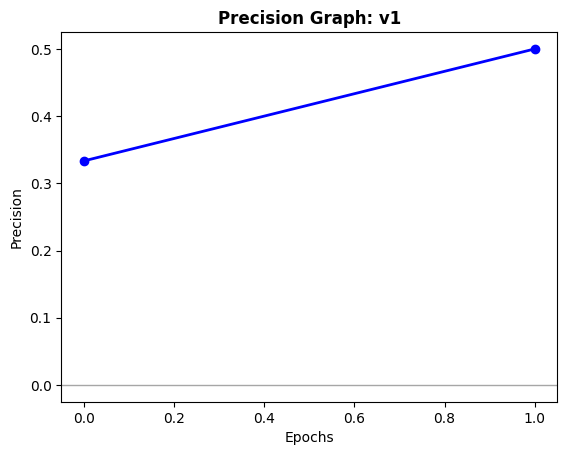

In [5]:
# Save precision plot -- tells how many positive predictions are actually correct.
plt.plot(precision_array, linestyle="-", color="blue", marker="o", markersize=6, linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title(f"Precision Graph: v{VERSION+1}", weight="bold")
plt.axhline(y=0, color="gray", linestyle="-", linewidth=1, alpha=0.7)
plt.savefig(f"precision_graph_v{VERSION+1}.png")

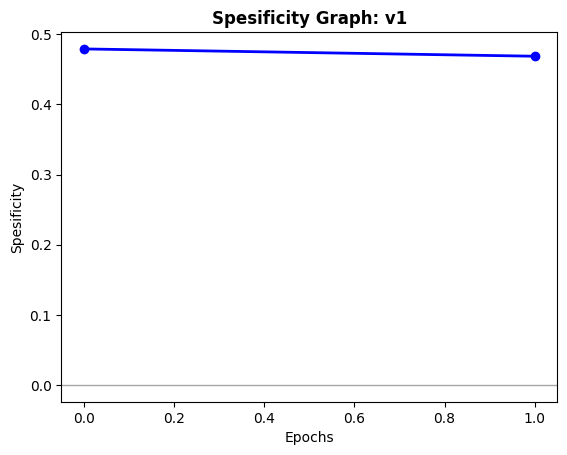

In [6]:
# Save spesificity plot -- if high ensures less false positive
plt.plot(specificity_array, linestyle="-", color="blue", marker="o", markersize=6, linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Spesificity")
plt.title(f"Spesificity Graph: v{VERSION+1}", weight="bold")
plt.axhline(y=0, color="gray", linestyle="-", linewidth=1, alpha=0.7)
plt.savefig(f"specificity_graph_v{VERSION+1}.png")

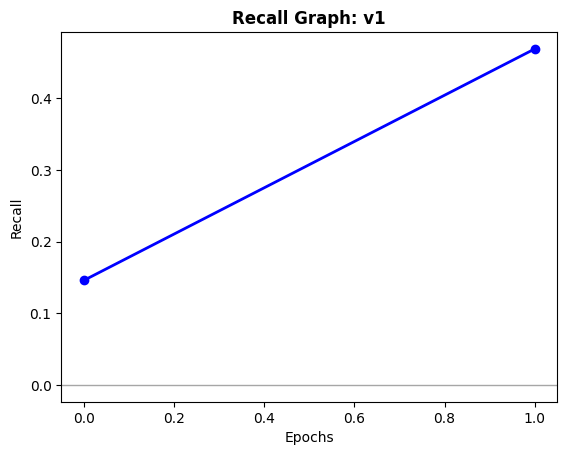

In [7]:
# Save recall plot -- if high ensures less false negative
plt.plot(recall_array, linestyle="-", color="blue", marker="o", markersize=6, linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.title(f"Recall Graph: v{VERSION+1}", weight="bold")
plt.axhline(y=0, color="gray", linestyle="-", linewidth=1, alpha=0.7)
plt.savefig(f"racall_graph_v{VERSION+1}.png")

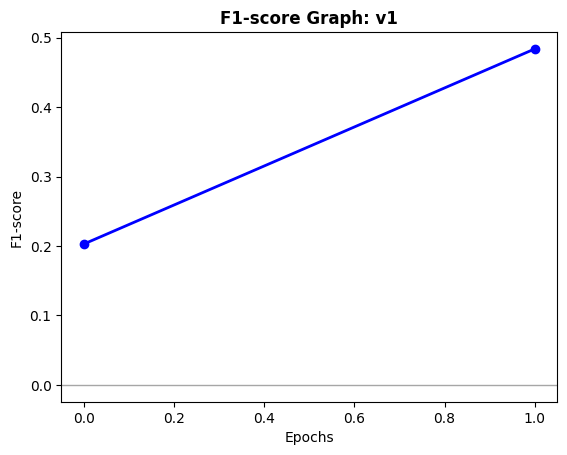

In [8]:
# Save f1-score plot
plt.plot(f1_score_array, linestyle="-", color="blue", marker="o", markersize=6, linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("F1-score")
plt.title(f"F1-score Graph: v{VERSION+1}", weight="bold")
plt.axhline(y=0, color="gray", linestyle="-", linewidth=1, alpha=0.7)
plt.savefig(f"f1_graph_v{VERSION+1}.png")

In [11]:
# Load pt for visualisation
loaded_data = torch.load("visualisation_tensors.pt")

# Convert to tensors
all_probabilities = loaded_data["all_probs"]
all_predictions = loaded_data["all_preds"]
all_labels = loaded_data["all_labels"]

C:\Users\Tykhin\AppData\Local\Temp\ipykernel_4556\1018802951.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load("visualisation_tensors.pt")


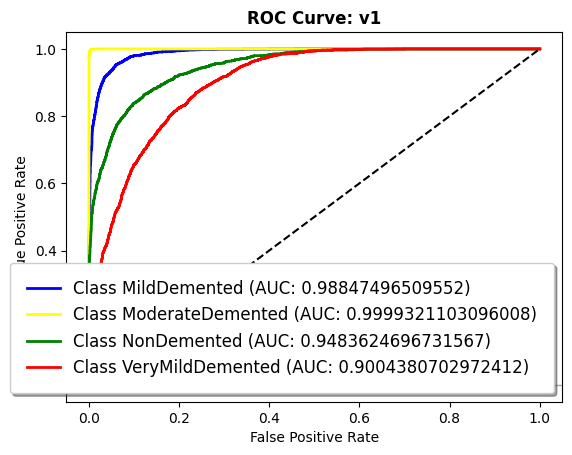

In [17]:
# Save Roc curve
roc_metric = MulticlassROC(num_classes=num_classes).to(device)
auc_metric = MulticlassAUROC(num_classes=num_classes, average=None).to(device)

colors = ["blue", "yellow", "green", "red"]

fpr, tpr, _ = roc_metric(all_probabilities, all_labels)
auc_score = auc_metric(all_probabilities, all_labels)

for i, _ in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC: {auc_score[i]})", color=colors[i], markersize=6, linewidth=2)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve: v{VERSION+1}", weight="bold")
plt.legend(loc="lower right", fontsize=12, frameon=True, shadow=True, fancybox=True, borderpad=1)
plt.axhline(y=0, color="gray", linestyle="-", linewidth=1, alpha=0.7)
plt.savefig(f"roc_curve_v{VERSION+1}.png")

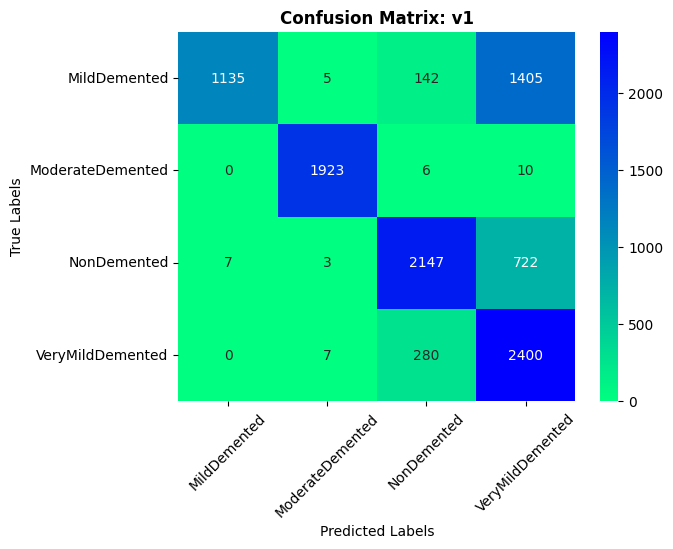

In [23]:
# Save Confusion Matrix
conf_matrix_metric = MulticlassConfusionMatrix(num_classes=num_classes).to(device)

conf_matrix = conf_matrix_metric(all_predictions, all_labels).cpu().numpy()

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="winter_r", xticklabels=class_names, yticklabels=class_names)
plt.xticks(rotation=45)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix: v{VERSION+1}", weight="bold")
plt.savefig(f"conf_matrix_v{VERSION+1}.png")